<a href="https://colab.research.google.com/github/dansojo/eye-disease-classification/blob/main/EDA/Eye_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random
from PIL import Image

In [5]:
Combined_path = "/content/drive/MyDrive/Eye Disease Image Dataset/data/Combined Dataset"
Original_path = "/content/drive/MyDrive/Eye Disease Image Dataset/data/Original Dataset"
augmented_path = "/content/drive/MyDrive/Eye Disease Image Dataset/data/Augmented Dataset"


In [8]:
def count_images_by_class(path):
    class_counts = {}
    for class_name in os.listdir(path):
        class_dir = os.path.join(path, class_name)
        if os.path.isdir(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))
    return class_counts

In [9]:
original_counts = count_images_by_class(Original_path)
augmented_counts = count_images_by_class(augmented_path)
Combined_counts = count_images_by_class(Combined_path)

In [10]:
print(original_counts)
print(augmented_counts)
print(Combined_counts)

{'Pterygium': 17, 'Myopia': 500, 'Retinal Detachment': 125, 'Retinitis Pigmentosa': 139, 'Central Serous Chorioretinopathy [Color Fundus]': 101, 'Diabetic Retinopathy': 1509, 'Disc Edema': 127, 'Glaucoma': 1349, 'Healthy': 1024, 'Macular Scar': 444}
{'Pterygium': 102, 'Retinal Detachment': 750, 'Retinitis Pigmentosa': 834, 'Central Serous Chorioretinopathy [Color Fundus]': 606, 'Diabetic Retinopathy': 3444, 'Disc Edema': 762, 'Glaucoma': 2880, 'Healthy': 2676, 'Macular Scar': 1937, 'Myopia': 2251}
{'Pterygium': 119, 'Myopia': 2751, 'Retinal Detachment': 875, 'Retinitis Pigmentosa': 973, 'Central Serous Chorioretinopathy [Color Fundus]': 707, 'Diabetic Retinopathy': 4953, 'Disc Edema': 889, 'Glaucoma': 4229, 'Healthy': 3700, 'Macular Scar': 2381}


# 클래스별 증강 비율 분석 코드

In [12]:
# 계산
summary = []
for cls in original_counts:
    ori = original_counts.get(cls, 0)
    aug = augmented_counts.get(cls, 0)
    total = ori + aug
    ratio = (aug / ori) * 100 if ori > 0 else 0
    summary.append({
        "Class": cls,
        "Original": ori,
        "Augmented": aug,
        "Total": total,
        "Aug_Ratio(%)": round(ratio, 2)
    })

df_ratio = pd.DataFrame(summary).sort_values("Aug_Ratio(%)", ascending=False)
df_ratio

,Class,Original,Augmented,Total,Aug_Ratio(%)
0,Pterygium,17,102,119,600.00
2,Retinal Detachment,125,750,875,600.00
4,Central Serous Chorioretinopathy [Color Fundus],101,606,707,600.00
3,Retinitis Pigmentosa,139,834,973,600.00
6,Disc Edema,127,762,889,600.00
1,Myopia,500,2251,2751,450.20
9,Macular Scar,444,1937,2381,436.26
8,Healthy,1024,2676,3700,261.33
5,Diabetic Retinopathy,1509,3444,4953,228.23
7,Glaucoma,1349,2880,4229,213.49


<ipython-input-15-f8a42a846b65>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Aug_Ratio(%)', data=df_ratio, palette='viridis')


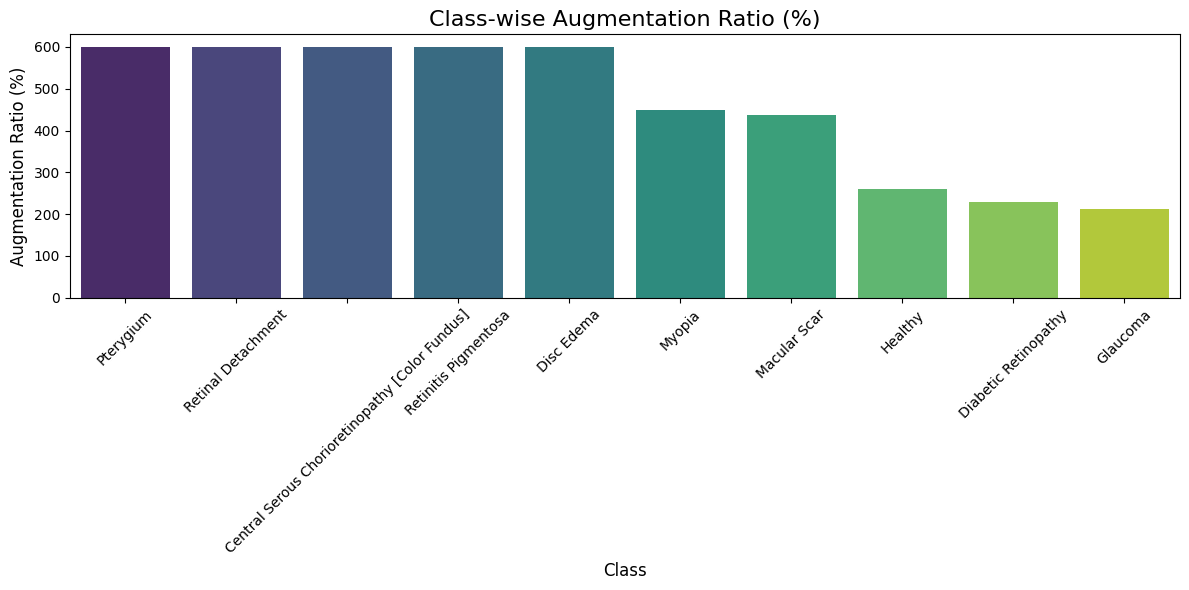

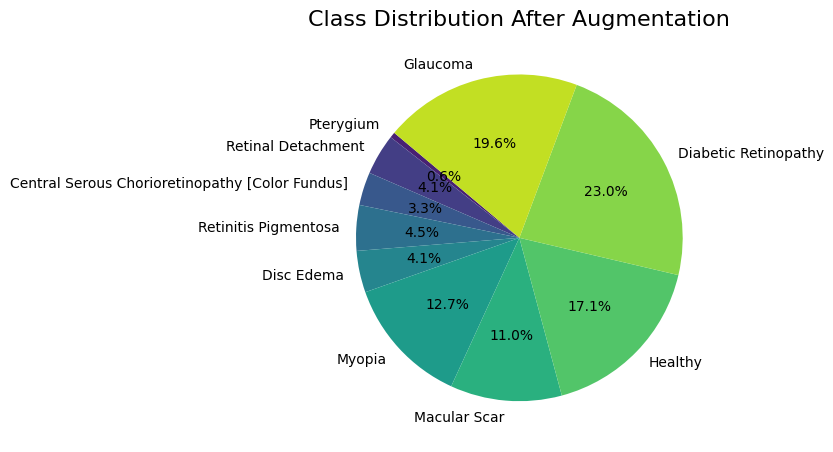

In [15]:
# 증강 비율 분석 코드 (이전 코드 포함)
def plot_augmentation_analysis(df_ratio):
    # 막대 그래프 시각화
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Class', y='Aug_Ratio(%)', data=df_ratio, palette='viridis')
    plt.title("Class-wise Augmentation Ratio (%)", fontsize=16)
    plt.xlabel("Class", fontsize=12)
    plt.ylabel("Augmentation Ratio (%)", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("/content/drive/MyDrive/Eye Disease Image Dataset/results/EDA_image/Class-wise Augmentation Ratio.png", dpi=300)
    plt.show()

    # 원형 그래프 시각화 (전체 데이터 비율)
    total_counts = df_ratio['Total'].sum()
    sizes = df_ratio['Total']
    labels = df_ratio['Class']

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(labels)))
    plt.title("Class Distribution After Augmentation", fontsize=16)
    plt.tight_layout()
    plt.savefig("/content/drive/MyDrive/Eye Disease Image Dataset/results/EDA_image/Class Distribution After Augmentation.png", dpi=300)
    plt.show()

# 시각화 함수 실행
plot_augmentation_analysis(df_ratio)

# 🔍 원본 클래스별 이미지 개수 시각화

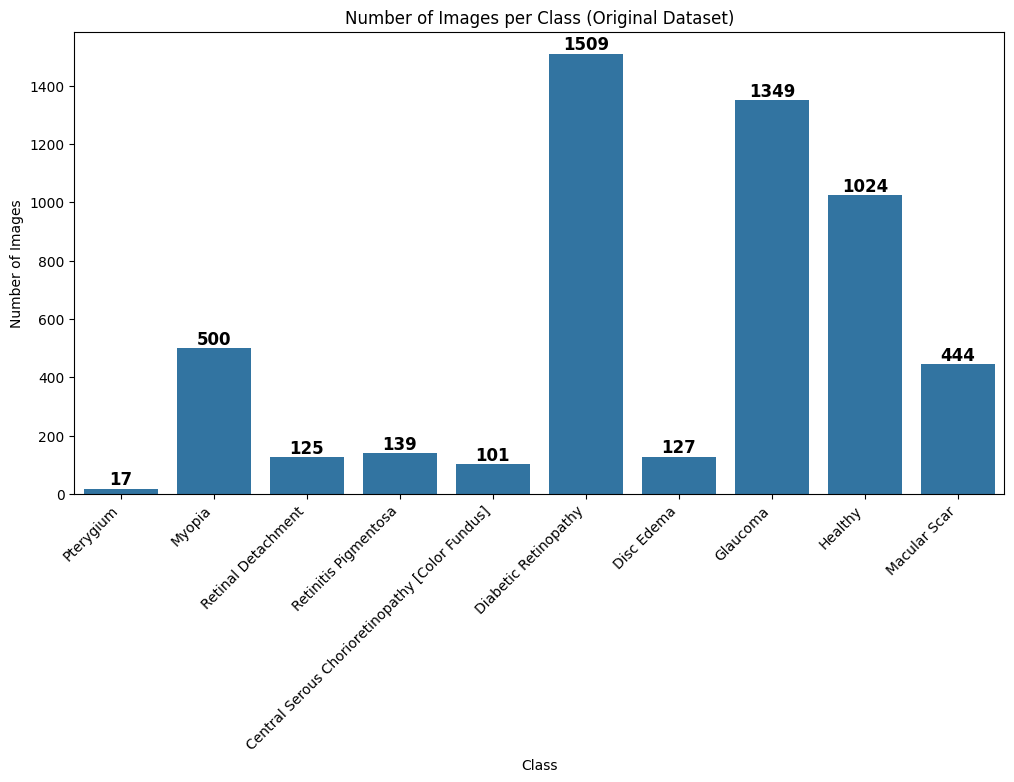

In [16]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=list(original_counts.keys()), y=list(original_counts.values()))

# 막대 위에 숫자 표시 (위치 조정)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),  # 위치: 막대의 중앙 상단
                ha='center', va='bottom',  # 중앙 정렬
                fontsize=12, color='black', fontweight='bold')  # 글자 스타일

plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class (Original Dataset)")
plt.savefig("/content/drive/MyDrive/Eye Disease Image Dataset/results/EDA_image/Original_class_count.png", dpi=300)
plt.show()

 원본 클래스별 데이터 불균형 분석 (비율 비교)

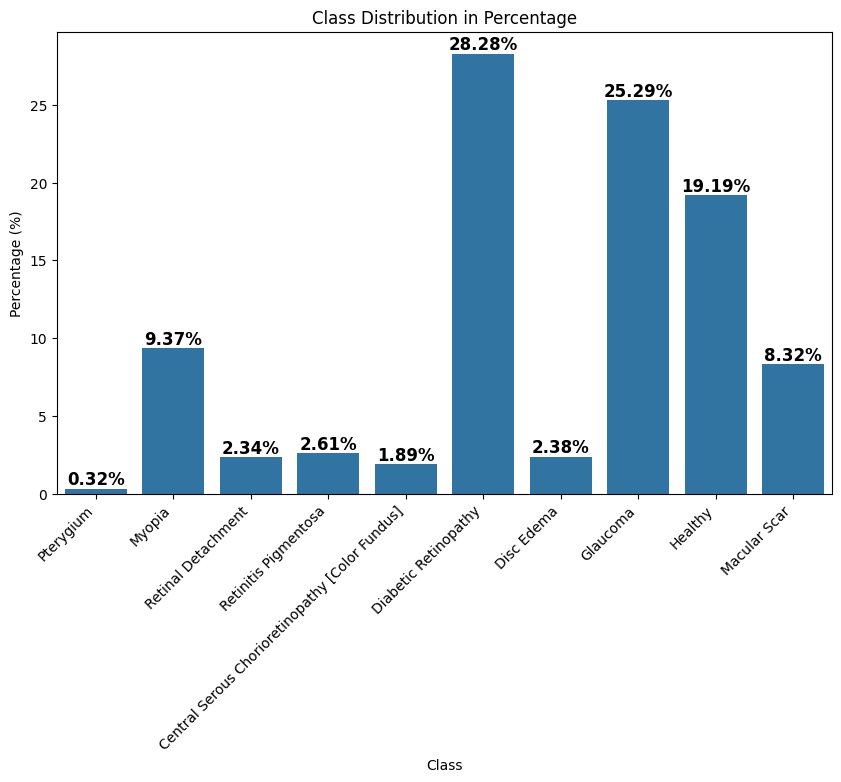

In [17]:
# 클래스별 이미지 개수 비율 분석
plt.figure(figsize=(10, 6))
class_ratios = {cls: count / sum(original_counts.values()) * 100 for cls, count in original_counts.items()}

ax = sns.barplot(x=list(class_ratios.keys()), y=list(class_ratios.values()))
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Percentage (%)")
plt.title("Class Distribution in Percentage")
plt.savefig("/content/drive/MyDrive/Eye Disease Image Dataset/results/EDA_image/Original_class_ratios.png", dpi=300)

plt.show()

# 🔍 원본 + 증강 클래스별 이미지 개수 시각화

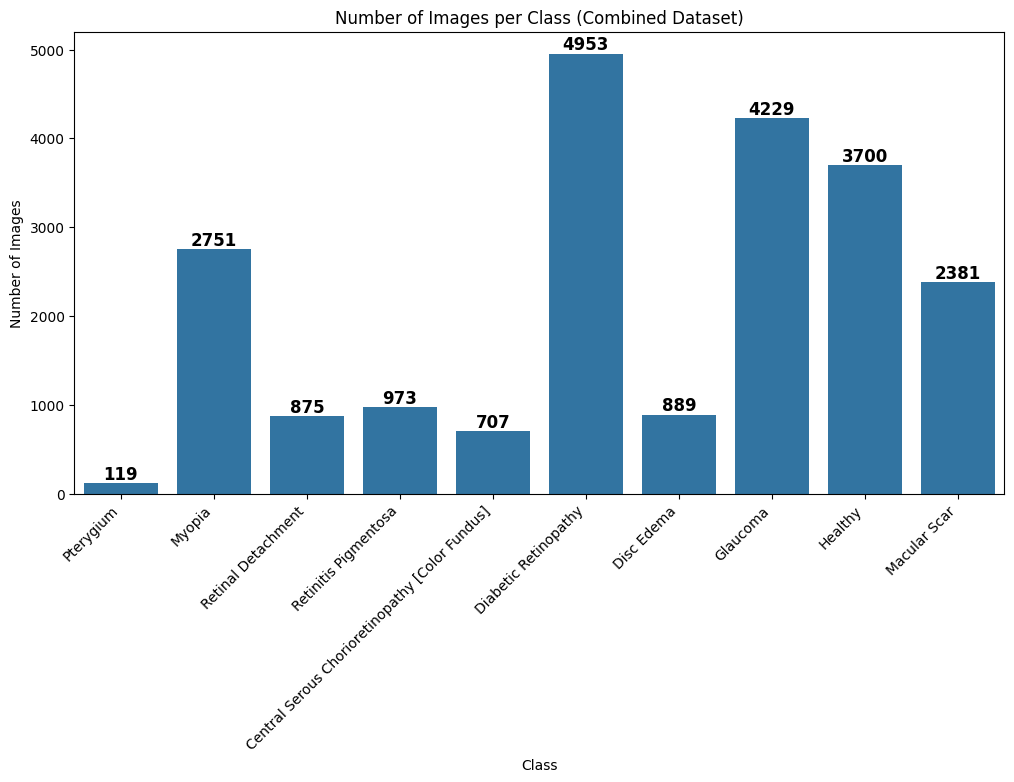

In [18]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=list(Combined_counts.keys()), y=list(Combined_counts.values()))

# 막대 위에 숫자 표시 (위치 조정)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),  # 위치: 막대의 중앙 상단
                ha='center', va='bottom',  # 중앙 정렬
                fontsize=12, color='black', fontweight='bold')  # 글자 스타일

plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class (Combined Dataset)")
plt.savefig("/content/drive/MyDrive/Eye Disease Image Dataset/results/EDA_image/class_count.png", dpi=300)
plt.show()

원본 + 증강 클래스별 데이터 불균형 분석 (비율 비교)

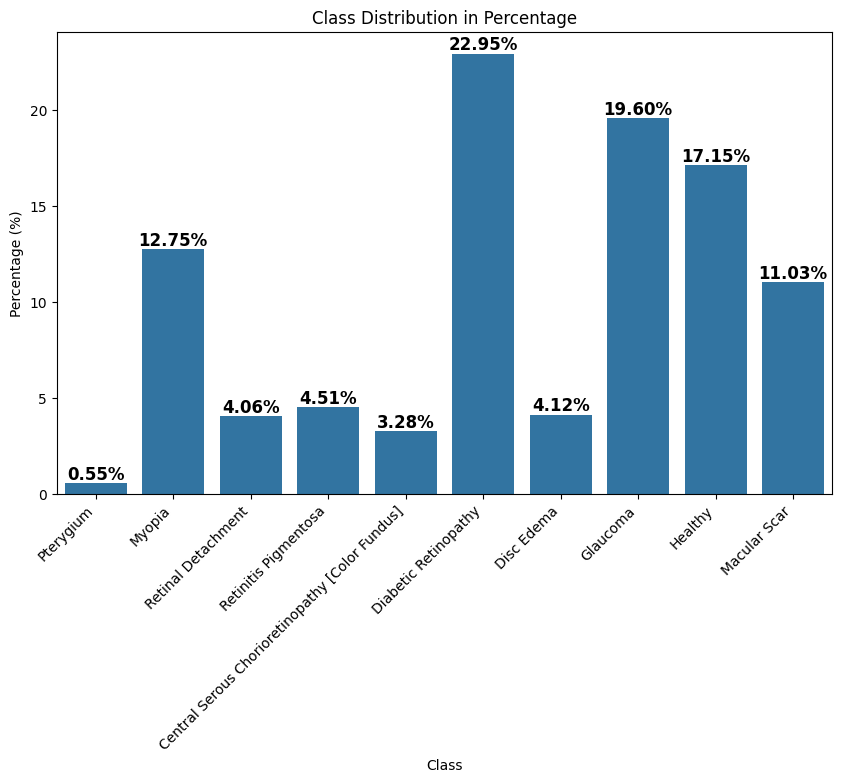

In [19]:
# 클래스별 이미지 개수 비율 분석
plt.figure(figsize=(10, 6))
class_ratios = {cls: count / sum(Combined_counts.values()) * 100 for cls, count in Combined_counts.items()}

ax = sns.barplot(x=list(class_ratios.keys()), y=list(class_ratios.values()))
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Percentage (%)")
plt.title("Class Distribution in Percentage")
plt.savefig("/content/drive/MyDrive/Eye Disease Image Dataset/results/EDA_image/class_ratios.png", dpi=300)

plt.show()

이미지 밝기 분석 (특정 클래스에서 어둡거나 밝은 이미지가 많은지 확인)

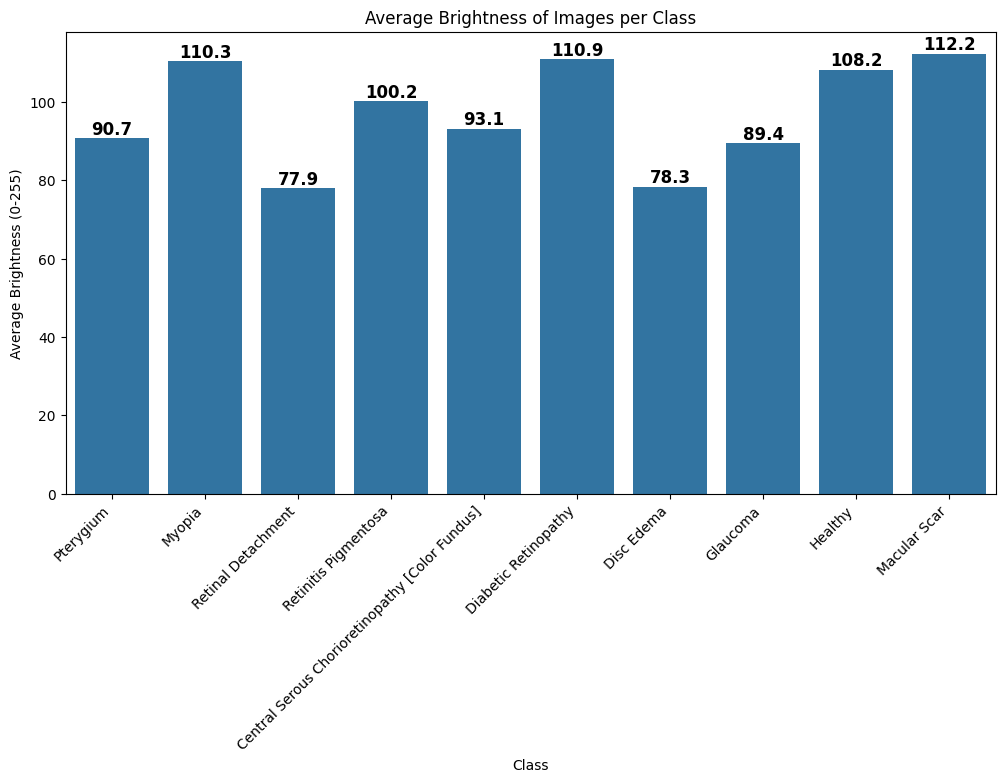

In [20]:
# 클래스별 평균 밝기 분석
brightness_values = {}
for class_name in Combined_counts.keys():
    class_path = os.path.join(Combined_path, class_name)
    sample_images = os.listdir(class_path)[:5]  # 클래스별 샘플링

    brightness_list = []
    for img_file in sample_images:
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # 흑백 변환
        brightness_list.append(np.mean(img))

    brightness_values[class_name] = np.mean(brightness_list)

# 밝기 비교 그래프
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=list(brightness_values.keys()), y=list(brightness_values.values()))
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Average Brightness (0-255)")
plt.title("Average Brightness of Images per Class")
plt.savefig("/content/drive/MyDrive/Eye Disease Image Dataset/results/EDA_image/class_brightness.png", dpi=300)
plt.show()

이미지 대비(Contrast) 분석

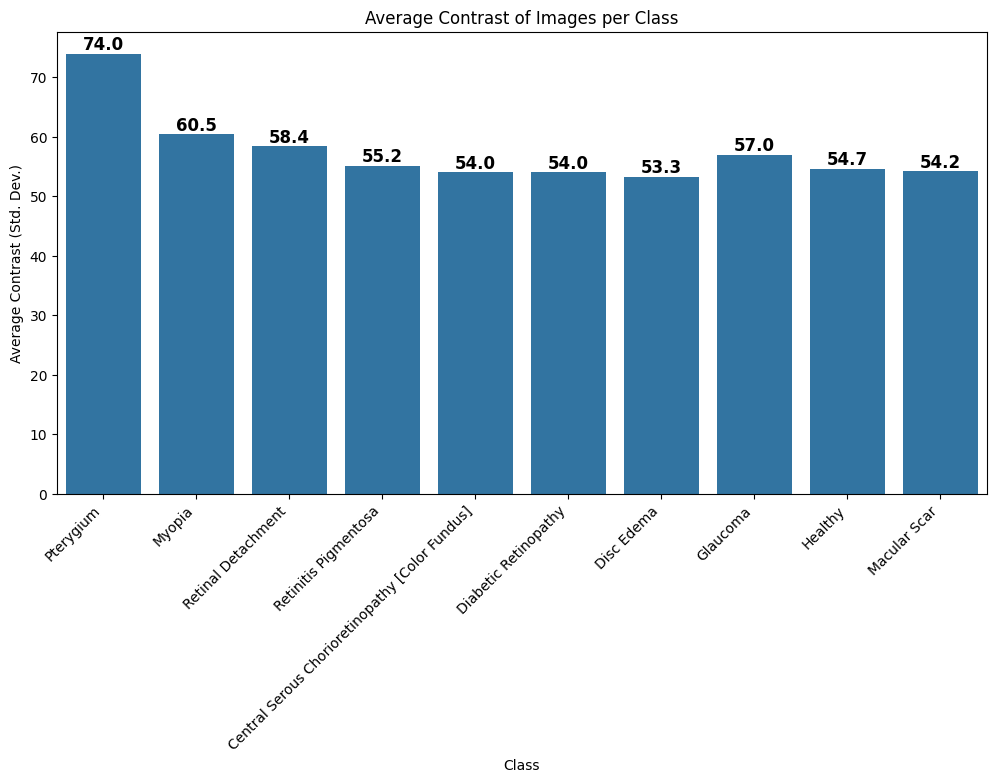

In [21]:
def calculate_contrast(image):
    return np.std(image)  # 표준편차가 클수록 대비(Contrast)가 큼

# 클래스별 평균 대비 분석
contrast_values = {}
for class_name in Combined_counts.keys():
    class_path = os.path.join(Combined_path, class_name)
    sample_images = os.listdir(class_path)[:5]  # 클래스별 샘플링

    contrast_list = []
    for img_file in sample_images:
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # 흑백 변환
        contrast_list.append(calculate_contrast(img))

    contrast_values[class_name] = np.mean(contrast_list)

# 대비 비교 그래프
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=list(contrast_values.keys()), y=list(contrast_values.values()))
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Average Contrast (Std. Dev.)")
plt.title("Average Contrast of Images per Class")
plt.savefig("/content/drive/MyDrive/Eye Disease Image Dataset/results/EDA_image/class_calculate_contrast.png", dpi=300)
plt.show()

데이터 중복 검사 (Duplicate Image Detection)

In [23]:
import os
import hashlib
from collections import defaultdict

def get_image_hash(image_path):
    """이미지의 해시(SHA-256) 값을 계산하는 함수"""
    with open(image_path, "rb") as f:
        return hashlib.sha256(f.read()).hexdigest()

# 중복 이미지 탐색 함수
def find_duplicates(data_path):
    hashes = {}
    duplicates = defaultdict(list)  # 클래스별 중복 이미지 기록

    for class_name in os.listdir(data_path):
        class_path = os.path.join(data_path, class_name)
        if not os.path.isdir(class_path):
            continue  # 클래스 폴더가 아닐 경우 건너뛰기

        all_images = os.listdir(class_path)

        for img_file in all_images:
            img_path = os.path.join(class_path, img_file)
            try:
                img_hash = get_image_hash(img_path)

                if img_hash in hashes:
                    duplicates[class_name].append(img_path)  # 클래스별로 중복 기록
                else:
                    hashes[img_hash] = img_path

            except Exception as e:
                print(f"❌ 이미지 처리 오류: {img_path} - {e}")

    return duplicates


# 중복 이미지 탐색 실행
duplicates = find_duplicates(Combined_path)

# 중복 이미지 개수 출력
total_duplicates = sum(len(paths) for paths in duplicates.values())
print(f"📌 발견된 중복 이미지 총 개수: {total_duplicates}")

# 클래스별 중복 이미지 개수 출력
for class_name, paths in duplicates.items():
    print(f"📂 {class_name}: {len(paths)} 중복 이미지 발견")


📌 발견된 중복 이미지 총 개수: 1395
📂 Myopia: 7 중복 이미지 발견
📂 Retinal Detachment: 7 중복 이미지 발견
📂 Retinitis Pigmentosa: 24 중복 이미지 발견
📂 Diabetic Retinopathy: 46 중복 이미지 발견
📂 Disc Edema: 60 중복 이미지 발견
📂 Glaucoma: 420 중복 이미지 발견
📂 Healthy: 477 중복 이미지 발견
📂 Macular Scar: 354 중복 이미지 발견


In [24]:
total_images = sum(Combined_counts.values())  # 전체 이미지 개수
duplicate_ratio = (1395 / total_images) * 100
print(f"📌 중복 이미지 비율: {duplicate_ratio:.2f}%")

📌 중복 이미지 비율: 6.47%


이미지 색상 분석 (RGB 채널 분포)

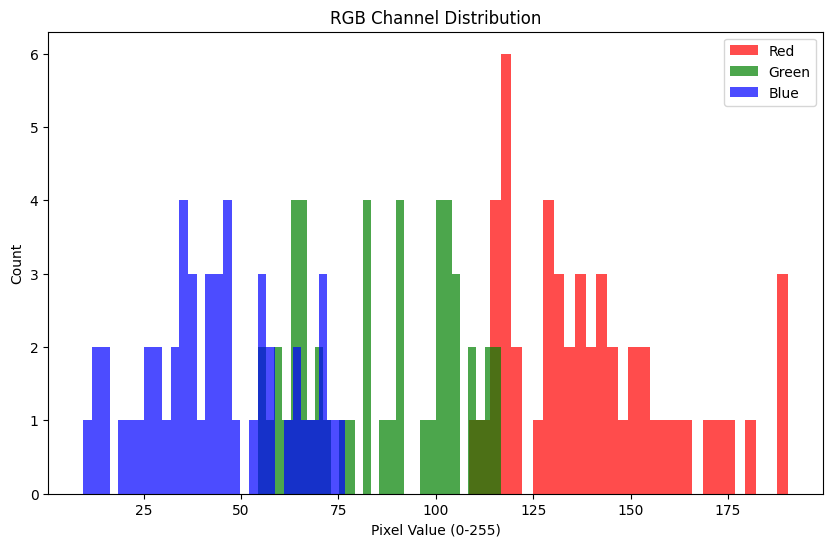

In [25]:
# RGB 색상 분포 분석
r_values, g_values, b_values = [], [], []

for class_name in Combined_counts.keys():
    class_path = os.path.join(Combined_path, class_name)
    sample_images = os.listdir(class_path)[:5]  # 각 클래스에서 샘플 이미지 확인

    for img_file in sample_images:
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR → RGB 변환

        r_values.append(np.mean(img[:, :, 0]))  # Red 채널 평균값
        g_values.append(np.mean(img[:, :, 1]))  # Green 채널 평균값
        b_values.append(np.mean(img[:, :, 2]))  # Blue 채널 평균값

# RGB 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(r_values, bins=30, alpha=0.7, label="Red", color='red')
plt.hist(g_values, bins=30, alpha=0.7, label="Green", color='green')
plt.hist(b_values, bins=30, alpha=0.7, label="Blue", color='blue')
plt.xlabel("Pixel Value (0-255)")
plt.ylabel("Count")
plt.legend()
plt.title("RGB Channel Distribution")
plt.savefig("/content/drive/MyDrive/Eye Disease Image Dataset/results/EDA_image/class_RGB.png", dpi=300)
plt.show()

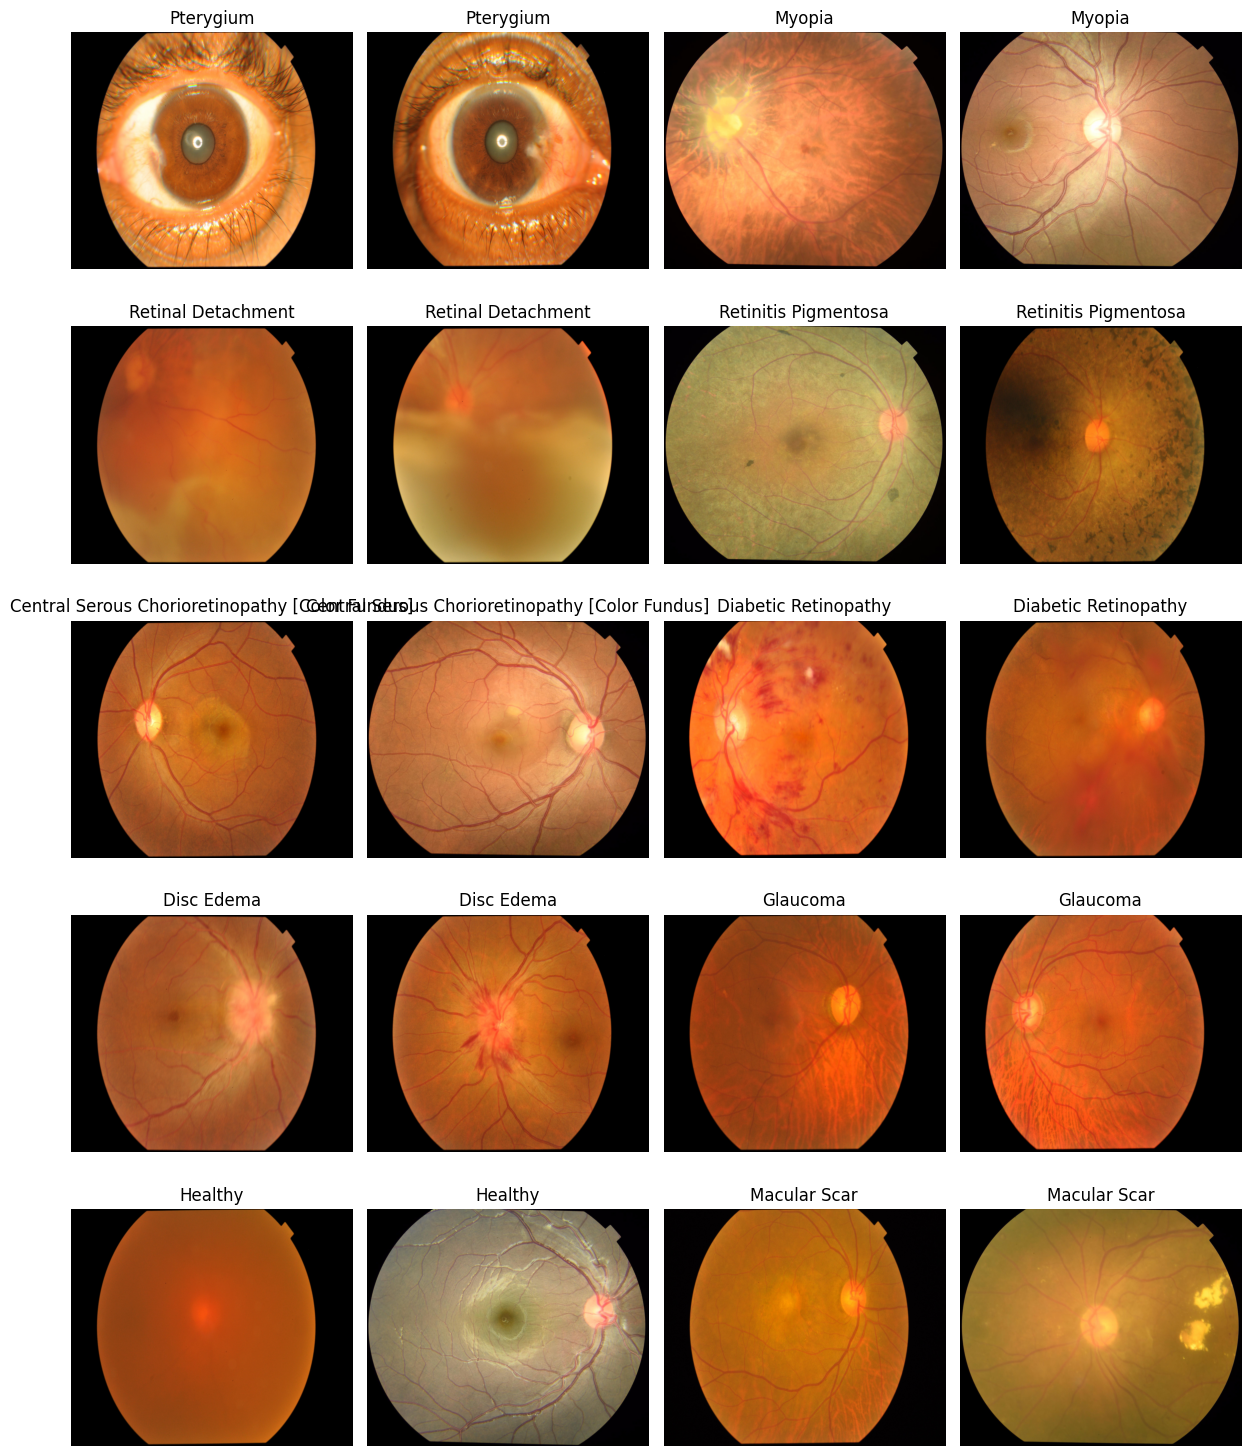

In [28]:
# 설정 값
num_samples = 2  # 클래스별 샘플 개수
num_rows = 5  # 출력할 행 수
num_cols = 4  # 출력할 열 수


class_names = os.listdir(Original_path)
sampled_images = []

# 각 클래스에서 샘플 이미지 추출 (원본 데이터만 대상으로 함)
for class_name in class_names:
    class_path = os.path.join(Original_path, class_name)
    image_files = os.listdir(class_path)
    if len(image_files) < num_samples:
        sampled_images.extend([(class_name, os.path.join(class_path, img)) for img in image_files])
    else:
        sampled_images.extend([(class_name, os.path.join(class_path, img)) for img in random.sample(image_files, num_samples)])

# 전체 이미지 수 (num_rows * num_cols)를 초과하지 않도록 조정
max_images = num_rows * num_cols
sampled_images = sampled_images[:max_images]

# 그리드로 이미지 출력
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3))
axes = axes.flatten()

for ax, (class_name, img_path) in zip(axes, sampled_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(class_name, fontsize=12)

# 남는 subplot 비우기
for i in range(len(sampled_images), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Eye Disease Image Dataset/results/EDA_image/class_image.png", dpi=300, bbox_inches='tight')
plt.show()